In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from nltk import pos_tag

In [157]:
file_path = r'C:\\Users\\hailay\\Documents\\Prodigy Infotech\\Twitter\\twitter_training.csv'
Twitter_Training = pd.read_csv(file_path)

In [158]:
df.head(10)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [159]:
file_path = r'C:\\Users\\hailay\\Documents\\Prodigy Infotech\\Twitter\\twitter_validation.csv'
Twitter_Validation = pd.read_csv(file_path)

In [160]:
df.head(10)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [161]:
import string
Twitter_Training.columns = ['Key', 'Source', 'Sentiment Analysis', 'Text']

In [162]:
Twitter_Training.head(5)

,Key,Source,Sentiment Analysis,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [163]:
Twitter_Validation.columns = ['Key', 'Source', 'Sentiment Analysis', 'Text']

In [164]:
Twitter_Validation.head(5)

,Key,Source,Sentiment Analysis,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [165]:
import nltk
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hailay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
from sklearn import preprocessing 
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords, and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in string.punctuation and token not in stop_words]
    return ' '.join(tokens)


In [167]:
Twitter_Validation.head(5)

,Key,Source,Sentiment Analysis,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [168]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hailay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hailay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [169]:
Twitter_Training.describe(include='all')

,Key,Source,Sentiment Analysis,Text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [170]:
Twitter_Validation.describe(include='all')

,Key,Source,Sentiment Analysis,Text
count,999.000000,999,999,999
unique,NaN,32,4,998
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6435.159159,NaN,NaN,NaN
std,3728.912226,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3241.500000,NaN,NaN,NaN
50%,6560.000000,NaN,NaN,NaN
75%,9662.500000,NaN,NaN,NaN


In [171]:
Sources = Twitter_Training['Source'].value_counts()

In [172]:
Sources.head(5)

Source
TomClancysRainbowSix    2400
MaddenNFL               2400
Microsoft               2400
LeagueOfLegends         2394
CallOfDuty              2394
Name: count, dtype: int64

In [173]:
Sources.tail(5)

Source
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                             2274
RedDeadRedemption(RDR)               2262
AssassinsCreed                       2244
Name: count, dtype: int64

In [174]:
Sources

Source
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [175]:
Sentiments = Twitter_Training['Sentiment Analysis'].value_counts()
Sentiments

Sentiment Analysis
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [176]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

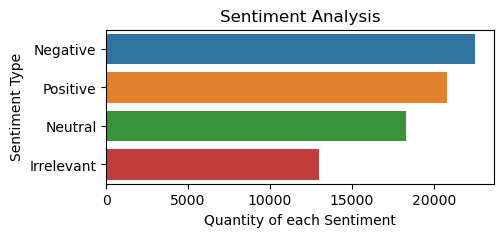

In [187]:
plt.figure(figsize=(5,2))
sns.barplot(y=Sentiments.index, x=Sentiments.values)  
plt.xlabel('Quantity of each Sentiment')
plt.ylabel('Sentiment Type')
plt.title('Sentiment Analysis')
plt.show()

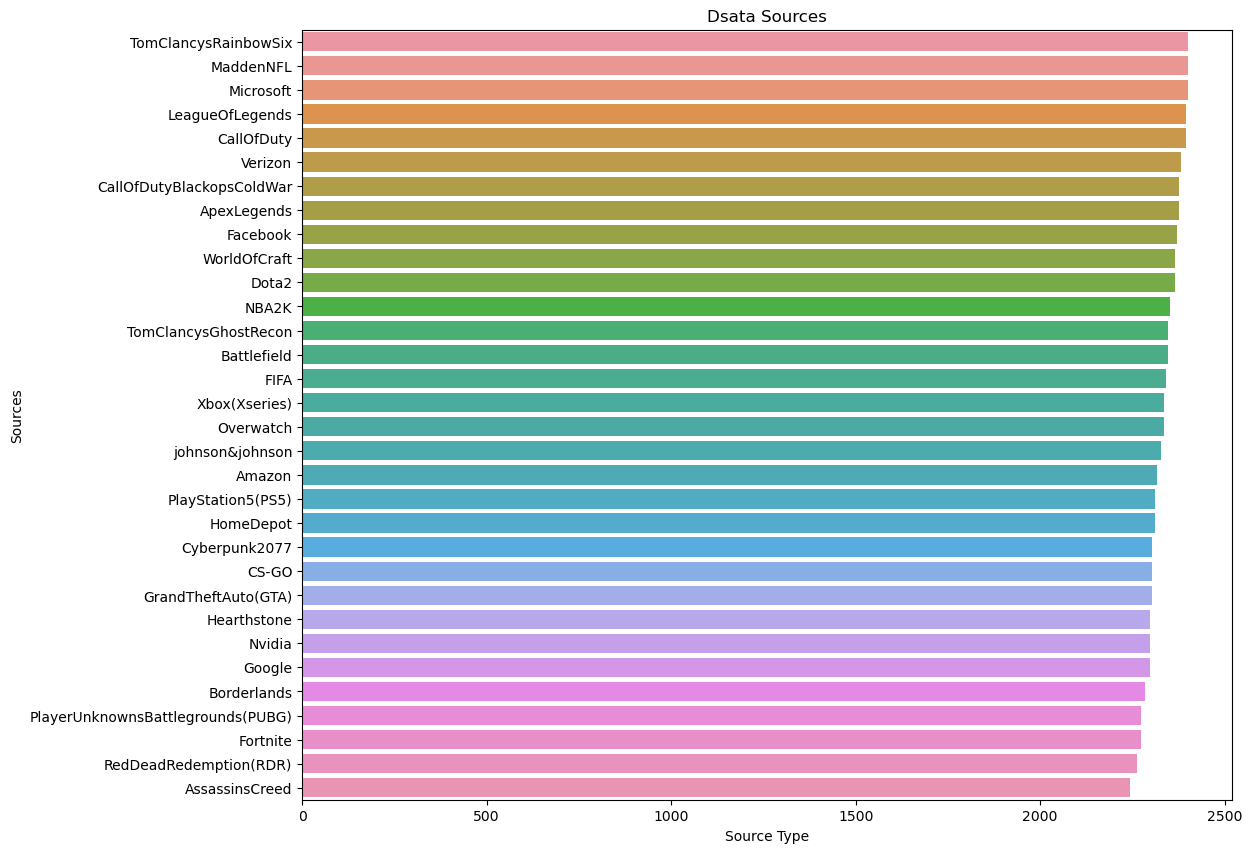

In [190]:
plt.figure(figsize=(12,10))
sns.barplot(y=Sources.index, x=Sources.values)  
plt.xlabel('Source Type')
plt.ylabel('Sources')
plt.title('Data Sources')
plt.show()